In [1]:
'''

Objective of this assignment is to use Keras to fit a NN and also play around with data. 
IN this data some rows have a)missing data, b) wrong data (with maybe a decimal missing causing its
value to explode). You will have to process the missing data, handle them by methods taught to you.
Use descriptive methos to find #missing drows etc. 
lung cancer prediction data set. Create a neural network architecture so that you get
an accuracy of >93% on the test data. USE KERAS FOR THIS.

This dataset has 33 columns. You need to figure out which columns are needed and which not.
Use Pandas to read this csv file and create features and output column.
Read this data set, use the inclass assignment work where you have created a neural network from
the hyper parameter given to construct the neural network, and fit it
Figure out what is the loss function, what is the activation function and show case the accuracy.
In my test run I got a test accuracy of ~~ 0.95, and training accuracy of ~~ 0.99

Please choose your own hyper parameter set: like num epochs, optimizer, loss function, 
activation function, #Neurons, etc.
The name of the file is cancerfile = "wdbcMissingData.csv". I have uploaded this file. 
This is a csv file

'''

'\n\nObjective of this assignment is to use Keras to fit a NN and also play around with data. \nIN this data some rows have a)missing data, b) wrong data (with maybe a decimal missing causing its\nvalue to explode). You will have to process the missing data, handle them by methods taught to you.\nUse descriptive methos to find #missing drows etc. \nlung cancer prediction data set. Create a neural network architecture so that you get\nan accuracy of >93% on the test data. USE KERAS FOR THIS.\n\nThis dataset has 33 columns. You need to figure out which columns are needed and which not.\nUse Pandas to read this csv file and create features and output column.\nRead this data set, use the inclass assignment work where you have created a neural network from\nthe hyper parameter given to construct the neural network, and fit it\nFigure out what is the loss function, what is the activation function and show case the accuracy.\nIn my test run I got a test accuracy of ~~ 0.95, and training accur

In [2]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from keras import models, layers, optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
cancerfile = "wdbcMissingData.csv"
cancer=pd.read_csv(cancerfile)

def datasetanalysis(df):
    #view starting values of data set
    print("Dataset Head")
    print(df.head(3))
    print("=" * 30)
    
    # View features in data set
    print("Dataset Features")
    print(df.columns.values)
    print("=" * 30)
    
    # View How many samples and how many missing values for each feature
    print("Dataset Features Details")
    print(df.info())
    print("=" * 30)
    
    # view distribution of numerical features across the data set
    print("Dataset Numerical Features")
    print(df.describe())
    print("=" * 30)
    
    # view distribution of categorical features across the data set
    print("Dataset Categorical Features")
    print(df.describe(include=['O']))
    print("=" * 30)
    
datasetanalysis(cancer)


Dataset Head
        id diagnosis  diagnosis_numeric  radius  texture  perimeter   area  \
0  8510426         B                0.0  13.540    14.36      87.46  566.3   
1  8510653         B                NaN  13.080    15.71      85.63  520.0   
2  8510824         B                NaN   9.504    12.44      60.34    NaN   

   smoothness  compactness  concavity           ...             radius_worse  \
0     0.09779      0.08129    0.06664           ...                    15.11   
1     0.10750      0.12700    0.04568           ...                    14.50   
2     0.10240      0.06492    0.02956           ...                    10.23   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          19.26            99.70       711.2            0.1440   
1          20.49            96.09       630.5            0.1312   
2          15.66            65.13       314.9            0.1324   

   compactness_worst  concavity_worst  concave_points_worst  symmetry_worst  \
0    

In [4]:
#summary of the data analysis: 
#the dataset contains 33 columns and the column diagnosis_numeric is the numeric representation of the type of 
#diagnosis 'B' and 'M'.I will encode the 'diagnosis' column so the 'diagnosis_numeric' column is not needed for training , also the 'id' column as it does not have any effect on the classification.
#the column 'area' and 'smoothness' contains missing values.
#I suspect 'area' and 'concavity' column contains some big values which needed to be corrected.


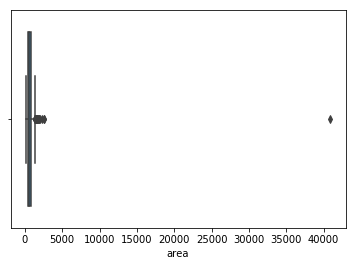

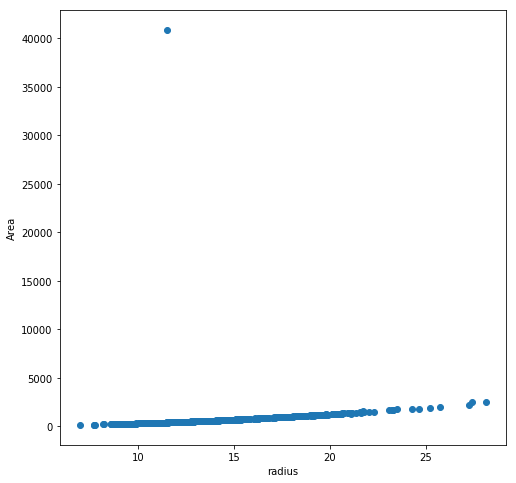

In [5]:
#lets detect the big values/outliers.
import seaborn as sns

#for area:
sns.boxplot(x=cancer['area'])
#the boxplot shows there's a point above 40000 and some other points around 2000/3000, all the other points are below 3000 and are included in the box, so definitely these are outliers.
#let's check the scatter plot to get better idea.
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(cancer['radius'],cancer['area'])
ax.set_xlabel('radius')
ax.set_ylabel('Area')
plt.show()


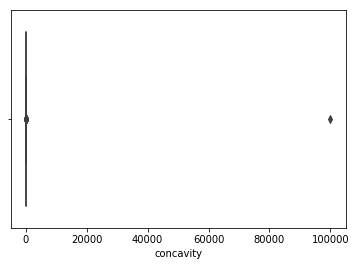

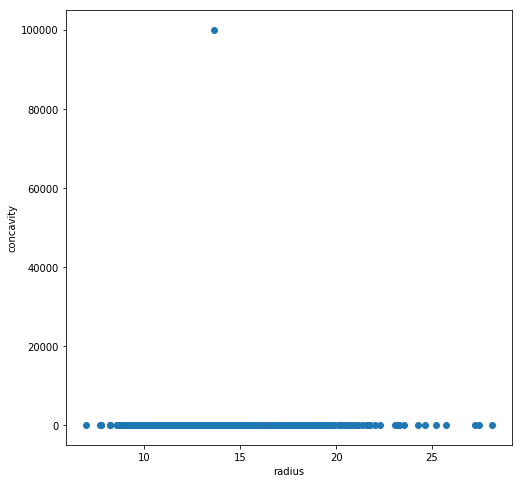

In [6]:
#therefore it's clear that there's one outlier in the column which is over 40000 in area.
#for concavity:
sns.boxplot(x=cancer["concavity"])

#the boxplot shows there's a point above 90000, much outside the box and all the other points are included in the box, so definitely this is an outlier.
#let's check the scatter plot to get better idea.
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(cancer['radius'],cancer['concavity'])
ax.set_xlabel('radius')
ax.set_ylabel('concavity')
plt.show()

#therefore it's clear that there's one outlier in the column which is over 90000 in concavity value.


In [7]:
#replacing outliers by mean.
cancer['area'].values[cancer['area'].values>40000]=cancer['area'].mean()
cancer['concavity'].values[cancer['concavity'].values>90000]=cancer['concavity'].mean()

#detecting the missing values.
print(cancer.isnull().sum())
print(cancer['smoothness'].isnull())
print(cancer['area'].isnull())

#replacing missing values with mean.
cancer['smoothness'].fillna(cancer['smoothness'].mean(), inplace=True)
cancer['area'].fillna(cancer['area'].mean(), inplace=True)


id                          0
diagnosis                   0
diagnosis_numeric          33
radius                      0
texture                     0
perimeter                   0
area                        2
smoothness                  1
compactness                 0
concavity                   0
concave_points              0
symmetry                    0
fractal_dimension           0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave_points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worse                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave_points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [8]:
cols = ['id','diagnosis', 'diagnosis_numeric', 'radius', 'texture', 'perimeter',
 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry',
 'fractal_dimension', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
 'symmetry_se', 'fractal_dimension_se', 'radius_worse' ,'texture_worst',
 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
 'concavity_worst', 'concave_points_worst', 'symmetry_worst',
 'fractal_dimension_worst']

#Load_data function.
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()


def LoadData(filename,cols, normalize=True):
    features=cols[3:len(cols)]
    y_class=cols[1]
    df=filename
    x_df=df[features]
    y_df=df[y_class]
    y_df = labelencoder_Y.fit_transform(y_df)
    x_data=np.array(pd.DataFrame(x_df,columns=features))
    y_data=np.array(pd.DataFrame(y_df))
    
    if(normalize):
        for i in range(x_data.shape[1]):
            mean=np.mean(x_data[:,i])
            x_data[:,i]-=mean
            stddev=np.std(x_data[:,i])
            if(stddev != 0):
                x_data[:,i] /= stddev
                
    train_x, test_x,  train_y, test_y = \
        train_test_split(x_data, y_data, test_size=0.2, random_state = 0)
    return train_x, train_y, test_x, test_y
#First handle the missing values, and then write the LoadData function
x_train, y_train, x_test, y_test =LoadData(cancer, cols, normalize=True)
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(455, 30) (455, 1) (114, 30) (114, 1)


In [12]:
#This is the model i found best fitting in terms of accuracy. I tried changing no. of hidden layers, neurons size, batch size, LR. I found the following setting is the best.
#Complete this function
def CreateModelGeneric(x_train, y_train, hyperParam):
    network = models.Sequential() # Initialising the NN

    network.add(layers.Dense(units = hyperParam['network'][0]['neurons'], activation = hyperParam['network'][0]['activation'], input_dim = hyperParam['inputN']))
    network.add(layers.Dense(units = hyperParam['network'][1]['neurons'], activation =  hyperParam['network'][1]['activation']))
    network.add(layers.Dense(units = hyperParam['network'][2]['neurons'], activation =  hyperParam['network'][2]['activation']))
    network.add(layers.Dense(units = hyperParam['network'][3]['neurons'], activation =  hyperParam['network'][3]['activation']))

    network.compile(optimizer = hyperParam['optimizer'](lr=hyperParam['learning_rate']), loss = "binary_crossentropy", metrics = ["accuracy"])

    network.fit(x_train, y_train, batch_size = hyperParam['batch_size'], epochs = hyperParam['epochs'])
    
    y_pred_train = network.predict(x_train)
    y_pred_train= [ 1 if y>=0.5 else 0 for y in y_pred_train ]
    
    cm_train = confusion_matrix(y_train, y_pred_train)
    accuracy_train = (cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[0][1]+cm_train[1][0]+cm_train[1][1])
    
    y_pred_test = network.predict(x_test)
    y_pred_test= [ 1 if y>=0.5 else 0 for y in y_pred_test ]
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    accuracy_test = (cm_test[0][0]+cm_test[1][1])/(cm_test[0][0]+cm_test[0][1]+cm_test[1][0]+cm_test[1][1])
    accuracy={}
    accuracy={"Training":accuracy_train,"Testing":accuracy_test}
    return accuracy


In [13]:
#Sample hyper parameter
hyperParam = {"optimizer": optimizers.RMSprop,
              "epochs": 100,
              "learning_rate": 0.001,
              "batch_size": 1,
              "inputN": x_train.shape[1],
              "network": [{"layer_name": "Input_lay1", "neurons": 32, "activation": "relu"},
                         {"layer_name": "HiddenLayer1", "neurons": 16, "activation": "relu"},
                         {"layer_name": "HiddenLayer2", "neurons": 8, "activation": "relu"},
                         {"layer_name": "OutputLayer4", "neurons": 1, "activation": "sigmoid"}
                         ]
             }
network = CreateModelGeneric(x_train, y_train, hyperParam)


Epoch 1/100
455/455 [==============================] - 1s 2ms/step - loss: 0.1898 - acc: 0.9429
Epoch 2/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0899 - acc: 0.9692
Epoch 3/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0768 - acc: 0.9736
Epoch 4/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0735 - acc: 0.9714
Epoch 5/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0766 - acc: 0.9780
Epoch 6/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0853 - acc: 0.9824
Epoch 7/100
455/455 [==============================] - 2s 4ms/step - loss: 0.0708 - acc: 0.9868ETA: 1s - loss: 0
Epoch 8/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0738 - acc: 0.9846
Epoch 9/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0624 - acc: 0.9890
Epoch 10/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0665 - acc: 0.9868
Epoch 11/100
455/455 [

455/455 [==============================] - 1s 2ms/step - loss: 0.0014 - acc: 1.0000
Epoch 86/100
455/455 [==============================] - 1s 2ms/step - loss: 4.8483e-07 - acc: 1.0000
Epoch 87/100
455/455 [==============================] - 1s 2ms/step - loss: 1.5670e-05 - acc: 1.0000
Epoch 88/100
455/455 [==============================] - 1s 2ms/step - loss: 5.3425e-06 - acc: 1.0000
Epoch 89/100
455/455 [==============================] - 1s 2ms/step - loss: 1.5635e-05 - acc: 1.0000
Epoch 90/100
455/455 [==============================] - 1s 2ms/step - loss: 5.9072e-06 - acc: 1.0000
Epoch 91/100
455/455 [==============================] - 1s 2ms/step - loss: 2.5290e-05 - acc: 1.0000
Epoch 92/100
455/455 [==============================] - 1s 2ms/step - loss: 2.2238e-05 - acc: 1.0000
Epoch 93/100
455/455 [==============================] - 1s 2ms/step - loss: 1.7796e-07 - acc: 1.0000
Epoch 94/100
455/455 [==============================] - 1s 2ms/step - loss: 3.5063e-06 - acc: 1.0000
Epoch 9

In [14]:
network

{'Training': 1.0, 'Testing': 0.956140350877193}